In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
print("All necessary libraries have been imported and configured.")

All necessary libraries have been imported and configured.


In [4]:
df=pd.read_csv('housing.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Categorizing Data

In [7]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
len(numerical_features), len(categorical_features)

(9, 1)

In [8]:
numerical_features[:5], categorical_features[:5]

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms'],
 ['ocean_proximity'])

## Now checking for missing values

In [9]:
missing_count = df.isnull().sum()

missing_percent=((missing_count/len(df))*100).round(2)

missing_table =(
    pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percent': missing_percent
    })
    .sort_values(by='Missing Percent', ascending=False)
)

missing_table[missing_table['Missing Percent'] > 0].head(10)


,Missing Count,Missing Percent
total_bedrooms,207,1.0


In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
structural_num_features =[
    "total_bedrooms"
]
df[structural_num_features] = df[structural_num_features].fillna(0)

### housing median age


In [12]:
lot_frontage_median = (
    df.groupby("ocean_proximity")["housing_median_age"]
    .median()
)
df["housing_median_age"]=df.apply(
    lambda row: lot_frontage_median[row["ocean_proximity"]]
    if pd.isna(row["housing_median_age"])
    else row["housing_median_age"],
    axis=1
)


<Axes: title={'center': 'Distribution of housing_median_age'}, xlabel='housing_median_age', ylabel='Count'>

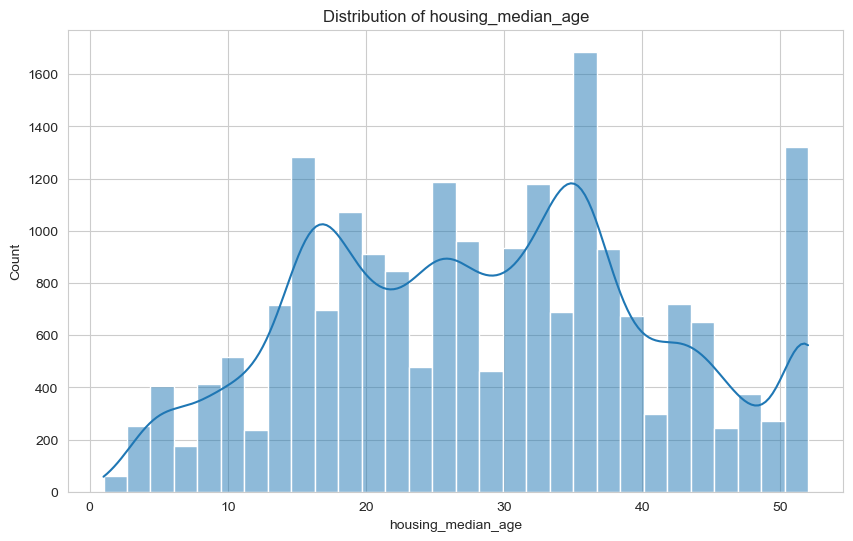

In [13]:
plt.figure(figsize=(10,6))
plt.title("Distribution of housing_median_age")
sns.histplot(df["housing_median_age"], bins=30, kde=True)


Text(0.5, 1.0, 'Boxplot of housing_median_age')

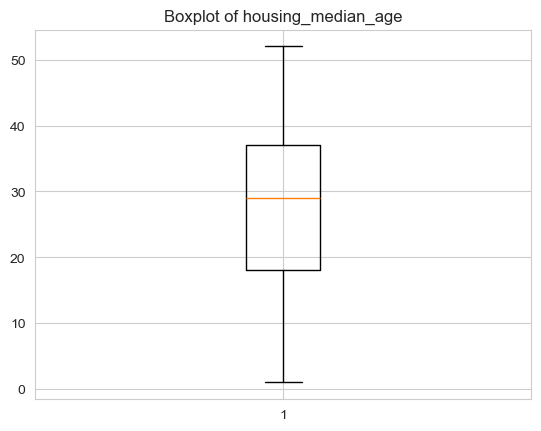

In [14]:
plt.boxplot(df["housing_median_age"])
plt.title("Boxplot of housing_median_age")